### 0. Imports and config

In [1]:
%load_ext autoreload
%autoreload 2
!pip install -e ../

Obtaining file:///mnt/c/Users/Stache/Desktop/Cours/MA1/ML/Project/project2
  Found existing installation: pubrecon 0.1
    Uninstalling pubrecon-0.1:
      Successfully uninstalled pubrecon-0.1
  Running setup.py develop for pubrecon


In [2]:
import os
import matplotlib.pyplot as plt
from pubrecon.data import DataFrame, ImagesData
from pubrecon.model import RCNN

Using TensorFlow backend.


In [10]:
# General
data_path = "../data/in/"
work_path = "../data/out/"
seed = 1337
verbose = 2

# DataFrame
dataframe_pickle_path = os.path.join(work_path, "dataframe.pickle")
force_preparation = True
subsamples = -1

# ImagesData
imagesdata_pickle_path = os.path.join(work_path, 'imagesdata.pickle')
number_of_results = 2500
iou_threshold = 0.85
max_samples = 15
show_infos = True
show_labels = True

# RCNN
model_and_weights_path = "../data/out/"
loss = None
opt = None
lr = 0.001
epochs = 100
split_size = 0.15
checkpoint_path = os.path.join(work_path, 'checkpoint.h5')
early_stopping = True
threshold = 0.85

### 1. DataFrame

In [11]:
dataframe = DataFrame(data_path, pickle_path=dataframe_pickle_path)

In [12]:
dataframe.prepare_data(force_preparation=force_preparation, subsamples=subsamples, verbose=verbose)

In [13]:
dataframe.summary()

We have 13 classes for 10 files, total points of data is 42.


### 2. ImagesData

In [14]:
imagesdata = ImagesData(dataframe, pickle_path=imagesdata_pickle_path)

In [15]:
# That part is quite long, beware!
imagesdata.prepare_images_and_labels(number_of_results=number_of_results, iou_threshold=iou_threshold,
                                     max_samples=max_samples, verbose=verbose)


Iterating through files...: 100%|██████████| 10/10 [02:25<00:00, 14.56s/it]


In [16]:
imagesdata.summary()

We have 241 samples for 13 classes.
['pub_image', 'logo', 'contenu_editorial', 'pub_jeu', 'pub_materiel_info', 'pub_double', 'background', 'dossier', 'pub_pleine_page', 'publicite', 'edito', 'article', 'sommaire']


### 3. Model

In [17]:
model = RCNN(imagesdata, loss=loss, opt=opt, lr=lr, verbose=verbose)













_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0        

/mnt/c/Users/Stache/Desktop/Cours/MA1/ML/Project/project2/pubrecon/model.py:57: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  self.model = Model(input=vggmodel.input, output=predictions)


In [18]:
model.train(epochs=epochs, split_size=split_size, checkpoint_path=checkpoint_path, early_stopping=early_stopping,
            verbose=verbose)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/1
1/1 [==============================] - 93s 93s/step - loss: 3.2554 - acc: 0.3125 - val_loss: 8.0590 - val_acc: 0.5000

Epoch 00001: val_loss improved from inf to 8.05905, saving model to ../data/out/checkpoint.h5


### 4. Metrics

In [20]:
loss = model.history()['loss']
val_loss = model.history()['val_loss']
accuracy = model.history()['acc']
val_accuracy = model.history()['val_acc']

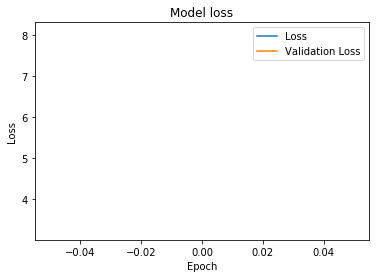

In [21]:
# Loss
plt.plot(loss)
plt.plot(val_loss)
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss", "Validation Loss"])
plt.show()

In [22]:
print("Final loss: {}".format(loss)[-1])

]


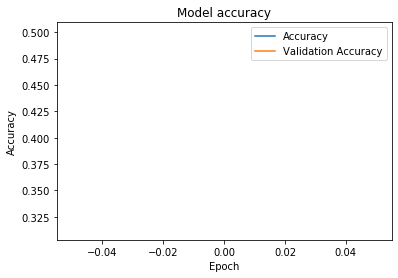

In [25]:
# Accuracy
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()

In [26]:
print("Final loss: {}".format(accuracy[-1]))

Final loss: 0.3125


### 5. Recognition example

In [ ]:
imagesdata.show_image(6, show_infos=show_infos, show_labels=show_labels)

In [ ]:
model.test_image(6, show_infos=show_infos, show_labels=show_labels, number_of_results=number_of_results,
                 threshold=threshold, verbose=verbose)